In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras import regularizers

In [2]:
(x_train,_),(x_test,_) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

x_train = x_train.reshape((len(x_train),-1))
x_test = x_test.reshape((len(x_test),-1))

In [4]:
input_img = Input(shape = (784,))
encoded = Dense(128,activation = "relu", activity_regularizer=regularizers.l1(1e-5))(input_img)
encoded = Dense(64,activation = "relu")(encoded)
latent = Dense(32,activation = "sigmoid")(encoded)

In [5]:
decoded = Dense(64,activation = "relu")(latent)
decoded = Dense(128,activation = "relu")(decoded)
output_img = Dense(784,activation = "sigmoid")(decoded)

In [6]:
autoencoder = Model(input_img,output_img)

In [7]:
autoencoder.compile(optimizer = "adam",loss = "binary_crossentropy")

In [8]:
history = autoencoder.fit(x_train,x_train,epochs = 30,batch_size = 256,shuffle = True,validation_data = (x_test,x_test))

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.3883 - val_loss: 0.2513
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2496 - val_loss: 0.2423
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2419 - val_loss: 0.2379
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2375 - val_loss: 0.2345
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2315 - val_loss: 0.2194
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.2178 - val_loss: 0.2137
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2114 - val_loss: 0.2032
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2016 - val_loss: 0.1961
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1946 - val_loss: 0.1865
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1839 - val_loss: 0.1795
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1783 - val_loss: 0.1751
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
decoded_img = autoencoder.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


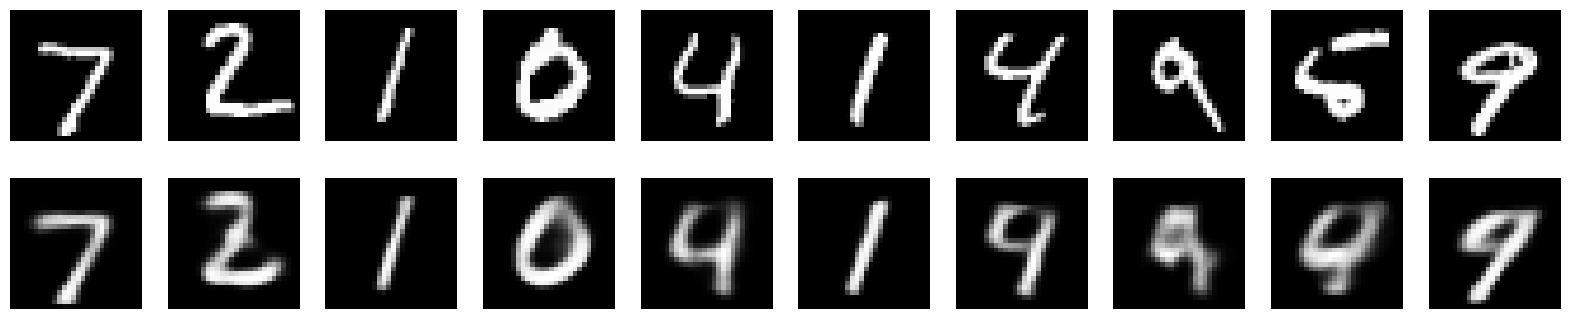

In [10]:
plt.figure(figsize=(20,4))
for i in range(10):
    ax = plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap = "gray")
    plt.axis('off')

    ax = plt.subplot(2,10,i+1+10)
    plt.imshow(decoded_img[i].reshape(28,28),cmap = "gray")
    plt.axis('off')

plt.show()